In [56]:
# Importing all libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [57]:
# Loading dataset into DataFrame called'df'
df = pd.read_csv('Players.csv')
# Dropping all of the rows that have 'NaN' value (otherwise I am not able to calculate mean and SD)
df = df.dropna(axis=0, how='any')
# Dropping all of the columns that are not relevant for this analysis
df = df.drop(['map_1', 'map_2', 'map_3', 'kast', 'kddiff', 'fkdiff', 'm1_kills', 'm1_assists', 'm1_deaths', 'm1_hs', 'm1_flash_assists', 'm1_kast', 'm1_kddiff', 'm1_adr', 'm1_fkdiff', 'm1_rating', 'm2_kills', 'm2_assists', 'm2_deaths', 'm2_hs', 'm2_flash_assists', 'm2_kast', 'm2_kddiff', 'm2_adr', 'm2_fkdiff', 'm2_rating', 'm3_kills', 'm3_assists', 'm3_deaths', 'm3_hs', 'm3_flash_assists', 'm3_kast', 'm3_kddiff', 'm3_adr', 'm3_fkdiff', 'm3_rating', 'kddiff_ct', 'kast_ct', 'kddiff_t', 'kast_t', 'm1_kills_ct', 'm1_deaths_ct', 'm1_kddiff_ct', 'm1_adr_ct', 'm1_kast_ct', 'm1_rating_ct', 'm1_kills_t', 'm1_deaths_t', 'm1_kddiff_t', 'm1_adr_t', 'm1_kast_t', 'm1_rating_t', 'm2_kills_ct', 'm2_deaths_ct', 'm2_kddiff_ct', 'm2_adr_ct', 'm2_kast_ct', 'm2_rating_ct', 'm2_kills_t', 'm2_deaths_t', 'm2_kddiff_t', 'm2_adr_t', 'm2_kast_t', 'm2_rating_t', 'm3_kills_ct', 'm3_deaths_ct', 'm3_kddiff_ct', 'm3_adr_ct', 'm3_kast_ct', 'm3_rating_ct', 'm3_kills_t', 'm3_deaths_t', 'm3_kddiff_t', 'm3_adr_t', 'm3_kast_t', 'm3_rating_t'], axis = 1)
df

,date,player_name,team,opponent,country,player_id,match_id,event_id,event_name,best_of,...,adr,rating,kills_ct,deaths_ct,adr_ct,rating_ct,kills_t,deaths_t,adr_t,rating_t
0,2020-02-26,Brehze,Evil Geniuses,Liquid,United States,9136,2339385,4901,IEM Katowice 2020,3,...,79.9,1.04,34.0,30.0,81.6,1.10,23.0,31.0,77.5,0.97
1,2020-02-26,CeRq,Evil Geniuses,Liquid,Bulgaria,11219,2339385,4901,IEM Katowice 2020,3,...,71.7,0.98,37.0,25.0,77.4,1.16,17.0,29.0,63.9,0.73
2,2020-02-26,EliGE,Liquid,Evil Geniuses,United States,8738,2339385,4901,IEM Katowice 2020,3,...,77.9,1.08,31.0,17.0,96.6,1.39,24.0,34.0,64.2,0.86
3,2020-02-26,Ethan,Evil Geniuses,Liquid,United States,10671,2339385,4901,IEM Katowice 2020,3,...,58.7,0.83,33.0,23.0,74.0,1.11,10.0,31.0,37.8,0.43
4,2020-02-26,NAF,Liquid,Evil Geniuses,Canada,8520,2339385,4901,IEM Katowice 2020,3,...,75.9,1.08,28.0,17.0,96.3,1.36,24.0,29.0,61.0,0.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337017,2016-08-11,RIKO,Prospects,Kaliber,United States,11737,2303837,2364,SL i-League S2 Americas Qualifier,3,...,89.1,1.22,42.0,31.0,104.6,1.39,36.0,42.0,74.2,1.06
337018,2016-08-11,aproto,Prospects,Kaliber,United States,11230,2303837,2364,SL i-League S2 Americas Qualifier,3,...,71.5,0.96,33.0,38.0,66.4,0.90,36.0,43.0,76.4,1.02
337019,2016-08-11,dsr,Kaliber,Prospects,Canada,9705,2303837,2364,SL i-League S2 Americas Qualifier,3,...,84.6,1.11,51.0,39.0,91.4,1.28,30.0,46.0,77.5,0.94
337020,2016-08-11,no_one,Kaliber,Prospects,United States,8750,2303837,2364,SL i-League S2 Americas Qualifier,3,...,90.9,1.20,53.0,37.0,102.1,1.31,40.0,37.0,79.2,1.08


In [58]:
df.describe()

,player_id,match_id,event_id,best_of,kills,assists,deaths,hs,flash_assists,adr,rating,kills_ct,deaths_ct,adr_ct,rating_ct,kills_t,deaths_t,adr_t,rating_t
count,30560.000000,3.056000e+04,30560.000000,30560.000000,30560.000000,30560.000000,30560.000000,30560.000000,30560.000000,30560.000000,30560.000000,30560.000000,30560.000000,30560.000000,30560.000000,30560.000000,30560.000000,30560.000000,30560.000000
mean,9736.456675,2.326869e+06,4010.916525,3.046924,54.386715,13.636387,54.391918,24.678534,3.285373,74.281708,1.047135,28.726702,25.658312,78.200740,1.056844,25.660013,28.733606,70.380632,1.037710
std,4163.769909,8.748601e+03,713.960929,0.306603,11.725006,4.718557,8.584071,7.999734,2.623876,10.954862,0.173129,8.196029,5.651073,14.707458,0.239282,7.581147,6.137687,14.531842,0.246293
min,7.000000,2.303837e+06,820.000000,1.000000,20.000000,0.000000,26.000000,3.000000,0.000000,33.500000,0.430000,3.000000,5.000000,26.100000,0.280000,3.000000,7.000000,17.800000,0.240000
25%,7965.000000,2.319701e+06,3432.000000,3.000000,46.000000,10.000000,49.000000,19.000000,1.000000,66.800000,0.930000,23.000000,22.000000,68.000000,0.890000,20.000000,25.000000,60.300000,0.870000
50%,9681.000000,2.328182e+06,4042.000000,3.000000,54.000000,13.000000,54.000000,24.000000,3.000000,73.800000,1.040000,28.000000,26.000000,77.500000,1.040000,25.000000,29.000000,69.600000,1.020000
75%,12547.000000,2.334694e+06,4605.000000,3.000000,61.000000,16.000000,59.000000,30.000000,5.000000,81.500000,1.160000,34.000000,29.000000,87.500000,1.210000,30.000000,33.000000,79.700000,1.190000
max,19994.000000,2.339744e+06,5225.000000,5.000000,148.000000,39.000000,115.000000,79.000000,20.000000,130.000000,1.880000,90.000000,56.000000,151.700000,2.140000,64.000000,69.000000,144.500000,2.420000


In [59]:
# Dividing original df into two DataFrames so that it is easier to read (df1 contains overall information and df2 info distinguished between CT and T)
df_1 = df[['player_name', 'team', 'opponent', 'country', 'player_id', 'match_id', 'event_id', 'event_name', 'best_of', 'kills', 'assists', 'deaths', 'hs', 'flash_assists', 'adr', 'rating']]
df_1

,player_name,team,opponent,country,player_id,match_id,event_id,event_name,best_of,kills,assists,deaths,hs,flash_assists,adr,rating
0,Brehze,Evil Geniuses,Liquid,United States,9136,2339385,4901,IEM Katowice 2020,3,57,14,61,29,0.0,79.9,1.04
1,CeRq,Evil Geniuses,Liquid,Bulgaria,11219,2339385,4901,IEM Katowice 2020,3,54,10,54,18,4.0,71.7,0.98
2,EliGE,Liquid,Evil Geniuses,United States,8738,2339385,4901,IEM Katowice 2020,3,55,10,51,28,1.0,77.9,1.08
3,Ethan,Evil Geniuses,Liquid,United States,10671,2339385,4901,IEM Katowice 2020,3,43,5,54,18,2.0,58.7,0.83
4,NAF,Liquid,Evil Geniuses,Canada,8520,2339385,4901,IEM Katowice 2020,3,52,22,46,23,9.0,75.9,1.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337017,RIKO,Prospects,Kaliber,United States,11737,2303837,2364,SL i-League S2 Americas Qualifier,3,78,28,73,29,0.0,89.1,1.22
337018,aproto,Prospects,Kaliber,United States,11230,2303837,2364,SL i-League S2 Americas Qualifier,3,69,12,81,39,0.0,71.5,0.96
337019,dsr,Kaliber,Prospects,Canada,9705,2303837,2364,SL i-League S2 Americas Qualifier,3,81,16,85,34,0.0,84.6,1.11
337020,no_one,Kaliber,Prospects,United States,8750,2303837,2364,SL i-League S2 Americas Qualifier,3,93,11,74,43,0.0,90.9,1.20


In [60]:
df_2 = df[['player_name', 'team', 'opponent', 'country', 'kills_ct', 'deaths_ct', 'adr_ct', 'rating_ct', 'kills_t', 'deaths_t', 'adr_t', 'rating_t']]
df_2

,player_name,team,opponent,country,kills_ct,deaths_ct,adr_ct,rating_ct,kills_t,deaths_t,adr_t,rating_t
0,Brehze,Evil Geniuses,Liquid,United States,34.0,30.0,81.6,1.10,23.0,31.0,77.5,0.97
1,CeRq,Evil Geniuses,Liquid,Bulgaria,37.0,25.0,77.4,1.16,17.0,29.0,63.9,0.73
2,EliGE,Liquid,Evil Geniuses,United States,31.0,17.0,96.6,1.39,24.0,34.0,64.2,0.86
3,Ethan,Evil Geniuses,Liquid,United States,33.0,23.0,74.0,1.11,10.0,31.0,37.8,0.43
4,NAF,Liquid,Evil Geniuses,Canada,28.0,17.0,96.3,1.36,24.0,29.0,61.0,0.87
...,...,...,...,...,...,...,...,...,...,...,...,...
337017,RIKO,Prospects,Kaliber,United States,42.0,31.0,104.6,1.39,36.0,42.0,74.2,1.06
337018,aproto,Prospects,Kaliber,United States,33.0,38.0,66.4,0.90,36.0,43.0,76.4,1.02
337019,dsr,Kaliber,Prospects,Canada,51.0,39.0,91.4,1.28,30.0,46.0,77.5,0.94
337020,no_one,Kaliber,Prospects,United States,53.0,37.0,102.1,1.31,40.0,37.0,79.2,1.08


## 1. K/D analysis

In [61]:
# Check the difference between Overall K/D (kills to deaths ratio) and distinguished between ct and t
# Create columns with appropriate K/D
df['Overall_K/D'] = df.kills / df.deaths
df['ct_K/D'] = df.kills_ct / df.deaths_ct
df['t_K/D'] = df.kills_t / df.deaths_t
df

,date,player_name,team,opponent,country,player_id,match_id,event_id,event_name,best_of,...,deaths_ct,adr_ct,rating_ct,kills_t,deaths_t,adr_t,rating_t,Overall_K/D,ct_K/D,t_K/D
0,2020-02-26,Brehze,Evil Geniuses,Liquid,United States,9136,2339385,4901,IEM Katowice 2020,3,...,30.0,81.6,1.10,23.0,31.0,77.5,0.97,0.934426,1.133333,0.741935
1,2020-02-26,CeRq,Evil Geniuses,Liquid,Bulgaria,11219,2339385,4901,IEM Katowice 2020,3,...,25.0,77.4,1.16,17.0,29.0,63.9,0.73,1.000000,1.480000,0.586207
2,2020-02-26,EliGE,Liquid,Evil Geniuses,United States,8738,2339385,4901,IEM Katowice 2020,3,...,17.0,96.6,1.39,24.0,34.0,64.2,0.86,1.078431,1.823529,0.705882
3,2020-02-26,Ethan,Evil Geniuses,Liquid,United States,10671,2339385,4901,IEM Katowice 2020,3,...,23.0,74.0,1.11,10.0,31.0,37.8,0.43,0.796296,1.434783,0.322581
4,2020-02-26,NAF,Liquid,Evil Geniuses,Canada,8520,2339385,4901,IEM Katowice 2020,3,...,17.0,96.3,1.36,24.0,29.0,61.0,0.87,1.130435,1.647059,0.827586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337017,2016-08-11,RIKO,Prospects,Kaliber,United States,11737,2303837,2364,SL i-League S2 Americas Qualifier,3,...,31.0,104.6,1.39,36.0,42.0,74.2,1.06,1.068493,1.354839,0.857143
337018,2016-08-11,aproto,Prospects,Kaliber,United States,11230,2303837,2364,SL i-League S2 Americas Qualifier,3,...,38.0,66.4,0.90,36.0,43.0,76.4,1.02,0.851852,0.868421,0.837209
337019,2016-08-11,dsr,Kaliber,Prospects,Canada,9705,2303837,2364,SL i-League S2 Americas Qualifier,3,...,39.0,91.4,1.28,30.0,46.0,77.5,0.94,0.952941,1.307692,0.652174
337020,2016-08-11,no_one,Kaliber,Prospects,United States,8750,2303837,2364,SL i-League S2 Americas Qualifier,3,...,37.0,102.1,1.31,40.0,37.0,79.2,1.08,1.256757,1.432432,1.081081


In [62]:
df.describe()

,player_id,match_id,event_id,best_of,kills,assists,deaths,hs,flash_assists,adr,...,deaths_ct,adr_ct,rating_ct,kills_t,deaths_t,adr_t,rating_t,Overall_K/D,ct_K/D,t_K/D
count,30560.000000,3.056000e+04,30560.000000,30560.000000,30560.000000,30560.000000,30560.000000,30560.000000,30560.000000,30560.000000,...,30560.000000,30560.000000,30560.000000,30560.000000,30560.000000,30560.000000,30560.000000,30560.000000,30560.000000,30560.000000
mean,9736.456675,2.326869e+06,4010.916525,3.046924,54.386715,13.636387,54.391918,24.678534,3.285373,74.281708,...,25.658312,78.200740,1.056844,25.660013,28.733606,70.380632,1.037710,1.016003,1.160697,0.923740
std,4163.769909,8.748601e+03,713.960929,0.306603,11.725006,4.718557,8.584071,7.999734,2.623876,10.954862,...,5.651073,14.707458,0.239282,7.581147,6.137687,14.531842,0.246293,0.238126,0.387768,0.313728
min,7.000000,2.303837e+06,820.000000,1.000000,20.000000,0.000000,26.000000,3.000000,0.000000,33.500000,...,5.000000,26.100000,0.280000,3.000000,7.000000,17.800000,0.240000,0.366667,0.200000,0.103448
25%,7965.000000,2.319701e+06,3432.000000,3.000000,46.000000,10.000000,49.000000,19.000000,1.000000,66.800000,...,22.000000,68.000000,0.890000,20.000000,25.000000,60.300000,0.870000,0.849057,0.888889,0.703704
50%,9681.000000,2.328182e+06,4042.000000,3.000000,54.000000,13.000000,54.000000,24.000000,3.000000,73.800000,...,26.000000,77.500000,1.040000,25.000000,29.000000,69.600000,1.020000,1.000000,1.107143,0.880000
75%,12547.000000,2.334694e+06,4605.000000,3.000000,61.000000,16.000000,59.000000,30.000000,5.000000,81.500000,...,29.000000,87.500000,1.210000,30.000000,33.000000,79.700000,1.190000,1.153846,1.368421,1.095238
max,19994.000000,2.339744e+06,5225.000000,5.000000,148.000000,39.000000,115.000000,79.000000,20.000000,130.000000,...,56.000000,151.700000,2.140000,64.000000,69.000000,144.500000,2.420000,2.620690,5.166667,3.375000


In [63]:
# Print out all of the information about mean and SD
print('Average overall K/D for all of the players =', df['Overall_K/D'].mean())
print('Standard Deviation of Overall K/D for all of the players =', df['Overall_K/D'].std())
print('Average K/D for the players playing on the Counter Terrorists side =', df['ct_K/D'].mean())
print('Standard Deviation of K/D for the players playing on the Counter Terrorists side=', df['ct_K/D'].std())
print('Average K/D for the players playing on the Terrorists side =', df['t_K/D'].mean())
print('Standard Deviation of K/D for the players playing on the Terrorists side =', df['t_K/D'].std())

Average overall K/D for all of the players = 1.0160026311081325
Standard Deviation of Overall K/D for all of the players = 0.23812642358832323
Average K/D for the players playing on the Counter Terrorists side = 1.160696946578469
Standard Deviation of K/D for the players playing on the Counter Terrorists side= 0.38776799881689483
Average K/D for the players playing on the Terrorists side = 0.9237401738517381
Standard Deviation of K/D for the players playing on the Terrorists side = 0.3137280387828329


In [64]:
# Creating a shorter dataframe so that it is easier to see what information I need
df_short = df[['player_name', 'Overall_K/D', 'ct_K/D', 't_K/D']]
df_short

,player_name,Overall_K/D,ct_K/D,t_K/D
0,Brehze,0.934426,1.133333,0.741935
1,CeRq,1.000000,1.480000,0.586207
2,EliGE,1.078431,1.823529,0.705882
3,Ethan,0.796296,1.434783,0.322581
4,NAF,1.130435,1.647059,0.827586
...,...,...,...,...
337017,RIKO,1.068493,1.354839,0.857143
337018,aproto,0.851852,0.868421,0.837209
337019,dsr,0.952941,1.307692,0.652174
337020,no_one,1.256757,1.432432,1.081081


In [65]:
# Looking for players that have a big difference between K/D
df_ct_high = df_short[(df_short['ct_K/D'] >= 1.5) & (df_short['t_K/D'] <= 0.8)]
df_t_high = df_short[(df_short['ct_K/D'] <= 0.6) & (df_short['t_K/D'] >= 1.3)]

print('There is', len(df_ct_high), 'players that have much higher K/D on CT side than on T side.')
print('There is', len(df_t_high), 'players that have much higher K/D on T side than on CT side.')

There is 1982 players that have much higher K/D on CT side than on T side.
There is 116 players that have much higher K/D on T side than on CT side.


In [66]:
# Check what players are in the dataframe with above-mentioned requirements
df_ct_high

,player_name,Overall_K/D,ct_K/D,t_K/D
2,EliGE,1.078431,1.823529,0.705882
5,Stewie2K,1.037037,1.611111,0.750000
361,Brollan,1.145833,1.590909,0.769231
555,electronic,0.912281,1.681818,0.428571
559,s1mple,1.239130,2.000000,0.703704
...,...,...,...,...
284111,rain,1.103448,1.615385,0.687500
285131,IyeN,1.020000,1.666667,0.742857
285135,jokes,1.039216,2.666667,0.538462
285138,tucks,1.066667,1.809524,0.416667


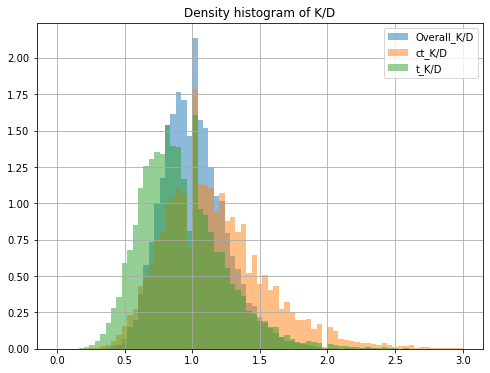

In [105]:
# Creating density histogram that combines 3 different histograms that describe 'Overall_K/D', 'ct_K/D', and 't_K/D'
plt.figure(figsize=(8,6))
plt.hist(df['Overall_K/D'], density=True, bins = np.arange(0, 3.0 + 0.04, 0.04), alpha = 0.5, label='Overall_K/D')
plt.hist(df['ct_K/D'], density=True, bins = np.arange(0, 3.0 + 0.04, 0.04), alpha = 0.5, label='ct_K/D')
plt.hist(df['t_K/D'], density=True, bins = np.arange(0, 3.0 + 0.04, 0.04), alpha = 0.5, label='t_K/D')
plt.grid(visible=True, which='both', color='darkgrey')
plt.title('Density histogram of K/D')
plt.legend(loc='upper right')

## 2. Group by country rating analysis

In [68]:
group_country = df.groupby('country').mean()
group_country

,player_id,match_id,event_id,best_of,kills,assists,deaths,hs,flash_assists,adr,...,deaths_ct,adr_ct,rating_ct,kills_t,deaths_t,adr_t,rating_t,Overall_K/D,ct_K/D,t_K/D
country,,,,,,,,,,,,,,,,,,,,,
Albania,17390.250000,2.337923e+06,4986.750000,3.000000,56.250000,11.250000,55.500000,32.750000,1.750000,77.275000,...,23.500000,82.300000,1.132500,27.000000,32.000000,72.450000,0.935000,1.015300,1.253684,0.844636
Algeria,13447.888889,2.322331e+06,3748.444444,3.000000,56.777778,14.111111,58.000000,25.666667,4.000000,74.477778,...,26.333333,72.955556,0.984444,29.444444,31.666667,75.311111,1.046667,0.982165,1.049486,0.943207
Argentina,11474.356913,2.327350e+06,4100.929260,3.025723,52.700965,13.726688,54.234727,24.491961,3.469453,74.376527,...,25.598071,77.146302,1.011350,26.028939,28.636656,71.644695,1.059936,0.984819,1.073445,0.932505
Australia,11063.151397,2.326083e+06,3920.316439,3.059779,54.446394,14.037687,55.202729,24.174139,3.237817,74.435023,...,25.681611,78.900910,1.061046,25.498376,29.521118,70.043795,1.016777,1.002064,1.165359,0.896404
Austria,11625.200000,2.328511e+06,4199.000000,3.000000,48.400000,10.800000,55.800000,24.600000,1.000000,65.360000,...,24.600000,70.880000,0.972000,21.600000,31.200000,60.080000,0.880000,0.877127,1.217618,0.722612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Kingdom,10863.370044,2.329337e+06,4167.246696,3.066079,54.515419,13.462555,55.006608,23.431718,3.118943,73.989868,...,25.378855,78.104846,1.064427,25.667401,29.627753,69.959471,1.022269,1.003092,1.175799,0.887856
United States,10981.221702,2.327638e+06,4062.669399,3.038251,54.805621,13.619438,54.490632,24.698283,3.403591,74.482631,...,25.749024,78.446292,1.066511,25.774395,28.741608,70.530094,1.044902,1.021182,1.168131,0.926625
Uruguay,13060.850000,2.331002e+06,4359.450000,3.000000,53.600000,12.150000,54.750000,25.600000,3.100000,73.770000,...,28.200000,70.335000,0.893500,27.550000,26.550000,77.440000,1.149000,0.990964,0.953335,1.064262


In [108]:
# Check mean for 'rating' 
group_country['rating'].describe()

count    77.000000
mean      1.047908
std       0.066891
min       0.747500
25%       1.033402
50%       1.045911
75%       1.062759
max       1.410000
Name: rating, dtype: float64

In [70]:
# Create function that classifies teams based on rating, average taken from 'group_country['rating'].describe()'
def countries_rating(rating):
    if rating >= 1.047908:
        return 'Above Average'
    else:
        return 'Below Average'

In [109]:
# Apply countries_rating function on our dataset, create a new column in the dataset to hold the rating variable
group_country['countries_rating'] = group_country['rating'].apply(countries_rating)
rating = group_country[['rating', 'countries_rating']].sort_values(by='rating', ascending=False).reset_index()
rating

,country,rating,countries_rating
0,Tunisia,1.410000,Above Average
1,Iraq,1.146000,Above Average
2,Montenegro,1.140000,Above Average
3,Italy,1.130000,Above Average
4,Malaysia,1.116634,Above Average
...,...,...,...
72,Syria,0.960000,Below Average
73,Kyrgyzstan,0.955000,Below Average
74,Azerbaijan,0.936522,Below Average
75,Austria,0.926000,Below Average


In [110]:
# Check how many countries are above average
print('There are', len(rating[rating['countries_rating'] == 'Above Average']), 'countries with rating above the average')

There are 33 countries with rating above the average


In [73]:
rating.describe()

,rating
count,77.000000
mean,1.047908
std,0.066891
min,0.747500
25%,1.033402
50%,1.045911
75%,1.062759
max,1.410000


Text(0.5, 1.0, 'Rating by countries')

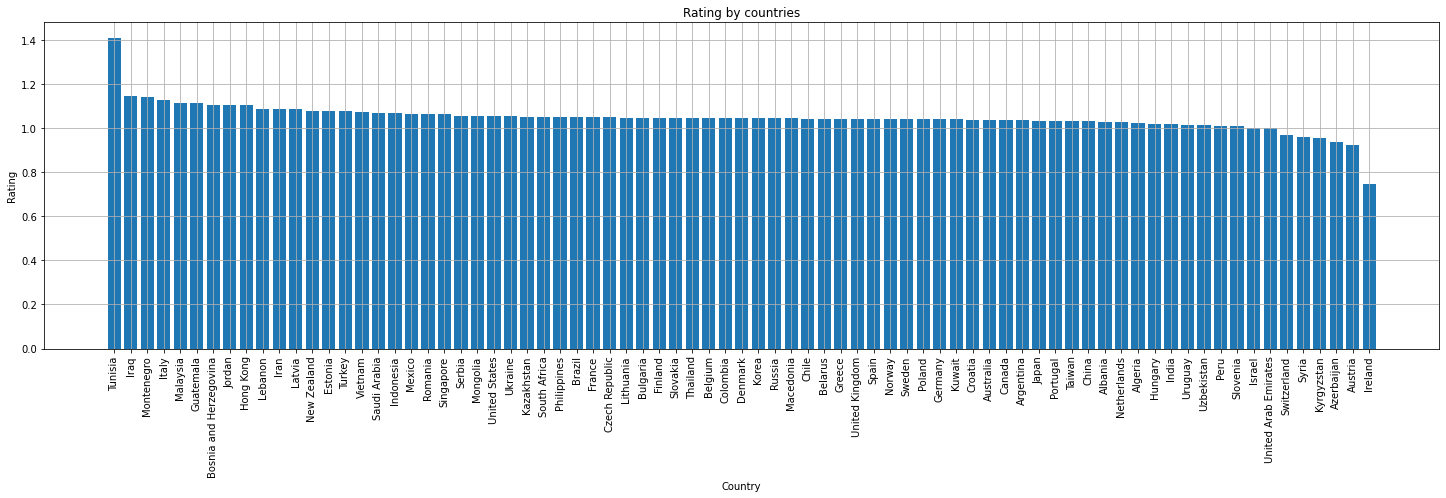

In [112]:
# Create bar chart of countries and their ratings
ypos = np.arange(len(rating['country']))
plt.figure(figsize=(25,6))
plt.xlabel('Country')
plt.ylabel('Rating')
plt.xticks(ypos, rating['country'], rotation = 90, fontsize = 'medium')
plt.grid(visible=True)
plt.bar(ypos, rating['rating'])
plt.title('Rating by countries')


Text(0.5, 1.0, 'Boxplot rating by countries')

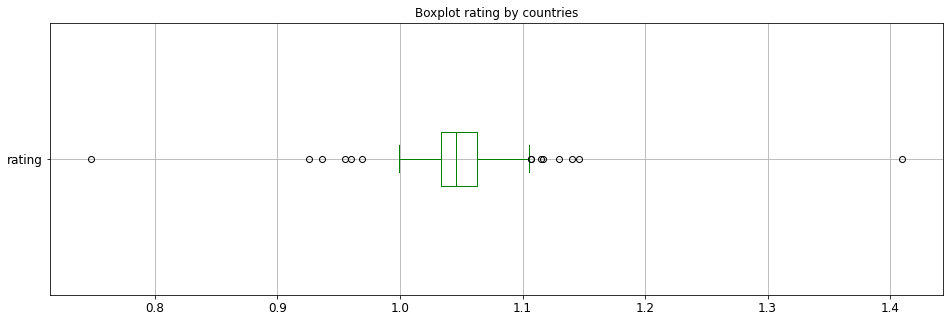

In [75]:
# Create boxplot to look for the outliers
plt.figure(figsize = (16,5))
rating.boxplot('rating', color = 'green',widths = (0.2), vert = False, fontsize='large')
plt.title('Boxplot rating by countries')

In [76]:
# Recall the equations for outliers:
# IQR = Q3 - Q1
# Low outliers: < Q1 - 1.5*(IQR)
# High Outliers: > Q3 + 1.5*(IQR)

# IQR:
IQR = 1.062759 - 1.033402

# Low outliers:
low_outliers = 1.033402 - 1.5*IQR

#High outliers:
high_outliers = 1.062759 + 1.5*IQR

print('IQR =', IQR)
print('Low outliers are below the value of', low_outliers)
print('High outliers are above the value of', high_outliers)

IQR = 0.029357000000000077
Low outliers are below the value of 0.9893664999999998
High outliers are above the value of 1.1067945000000001


In [77]:
# Checking how many outliers there are
outliers = rating[(rating['rating'] < 0.9893664999999998) | (rating['rating'] > 1.1067945000000001)]

print('There are', len(outliers), 'outliers.')

There are 14 outliers.


In [78]:
# Checking why Tunisia is outlier
df_1[df_1['country'] == 'Tunisia']

,player_name,team,opponent,country,player_id,match_id,event_id,event_name,best_of,kills,assists,deaths,hs,flash_assists,adr,rating
196091,Remind,Limitless,NASR,Tunisia,10479,2318731,3467,GeForce Cup 2017 GCC & MENA Finals,3,81,12,57,46,1.0,96.4,1.41


In [79]:
# Checking how many rows there are for players from United States 
df_1[df_1['country'] == 'United States']

,player_name,team,opponent,country,player_id,match_id,event_id,event_name,best_of,kills,assists,deaths,hs,flash_assists,adr,rating
0,Brehze,Evil Geniuses,Liquid,United States,9136,2339385,4901,IEM Katowice 2020,3,57,14,61,29,0.0,79.9,1.04
2,EliGE,Liquid,Evil Geniuses,United States,8738,2339385,4901,IEM Katowice 2020,3,55,10,51,28,1.0,77.9,1.08
3,Ethan,Evil Geniuses,Liquid,United States,10671,2339385,4901,IEM Katowice 2020,3,43,5,54,18,2.0,58.7,0.83
5,Stewie2K,Liquid,Evil Geniuses,United States,8797,2339385,4901,IEM Katowice 2020,3,56,8,54,31,3.0,67.2,1.08
7,nitr0,Liquid,Evil Geniuses,United States,7687,2339385,4901,IEM Katowice 2020,3,50,15,52,17,6.0,64.6,1.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337015,JoshRT,Prospects,Kaliber,United States,9342,2303837,2364,SL i-League S2 Americas Qualifier,3,70,11,71,30,0.0,71.5,0.98
337017,RIKO,Prospects,Kaliber,United States,11737,2303837,2364,SL i-League S2 Americas Qualifier,3,78,28,73,29,0.0,89.1,1.22
337018,aproto,Prospects,Kaliber,United States,11230,2303837,2364,SL i-League S2 Americas Qualifier,3,69,12,81,39,0.0,71.5,0.96
337020,no_one,Kaliber,Prospects,United States,8750,2303837,2364,SL i-League S2 Americas Qualifier,3,93,11,74,43,0.0,90.9,1.20


In [80]:
# Checking what are top 5 countries that are not outliers
top_5 = rating[rating['rating'] <= high_outliers].reset_index()
top_5.nlargest(5, 'rating')

,index,country,rating,countries_rating
0,8,Hong Kong,1.105254,Above Average
1,9,Lebanon,1.088889,Above Average
2,10,Iran,1.088000,Above Average
3,11,Latvia,1.087731,Above Average
4,12,New Zealand,1.079779,Above Average
